# Telco Customer Churn Prediction — Feature Engineering & Baseline Modeling

### Step 1: Load Preprocessed Data

In [16]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv('../data/preprocessed_telco.csv')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


/tmp/ipykernel_261414/1620143700.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)


In [17]:
df = pd.read_csv('../data/preprocessed_telco.csv')
df['Churn'].unique()
df['Churn'].isnull().sum()

np.int64(0)

### Step 2: Feature Engineering — Tenure Groups & Average Monthly Charge

In [18]:

def tenure_group(tenure):
    if tenure <= 12:
        return '0-12 months'
    elif tenure <= 24:
        return '12-24 months'
    elif tenure <= 48:
        return '24-48 months'
    else:
        return '48+ months'

df['tenure_group'] = df['tenure'].apply(tenure_group)
df['avg_monthly_charge'] = df['TotalCharges'] / df['tenure'].replace(0, 1)

# One-hot encode tenure_group
df = pd.get_dummies(df, columns=['tenure_group'], drop_first=True)
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,avg_monthly_charge
0,7590-VHVEG,0,-0.439916,1,0,-1.277445,0,1,-1.160323,-0.994971,...,False,False,False,False,False,False,False,True,False,0.778876
1,5575-GNVDE,1,-0.439916,0,0,0.066327,1,0,-0.259629,-0.173876,...,False,False,False,False,True,False,False,False,True,-2.621475
2,3668-QPYBK,1,-0.439916,0,0,-1.236724,1,1,-0.362660,-0.960399,...,False,False,False,False,False,False,False,False,True,0.776567
3,7795-CFOCW,1,-0.439916,0,0,0.514251,0,0,-0.746535,-0.195400,...,False,False,False,False,True,False,False,False,False,-0.379970
4,9237-HQITU,0,-0.439916,0,0,-1.236724,1,1,0.197365,-0.941193,...,False,False,False,False,False,False,False,True,False,0.761037


### Step 3: Separate Features and Target

In [19]:

X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training size: {X_train.shape}, Testing size: {X_test.shape}")


Training size: (5634, 31), Testing size: (1409, 31)


### Step 4: Baseline Model — Logistic Regression

In [20]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_lr):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_lr):.4f}")


Logistic Regression Performance:
Accuracy: 0.8041
Precision: 0.6551
Recall: 0.5535
F1 Score: 0.6000
ROC-AUC: 0.7241


**Observation:**  
The Logistic Regression model provides a solid baseline with balanced accuracy, precision, and recall. The ROC-AUC score indicates reasonable separation ability between churned and retained customers. This suggests that linear relationships between features and churn are significant but may be further improved with more complex models.

### Step 5: Baseline Model — Decision Tree Classifier

In [21]:

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dt):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_dt):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_dt):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_dt):.4f}")


Decision Tree Performance:
Accuracy: 0.7899
Precision: 0.6466
Recall: 0.4599
F1 Score: 0.5375
ROC-AUC: 0.6845


**Observation:**  
The top contributing features identified by the Decision Tree include contract type, tenure, monthly charges, and billing method. This reinforces our earlier EDA observations and confirms that contractual flexibility and billing factors heavily influence customer churn.

### Step 6: Feature Importance from Decision Tree

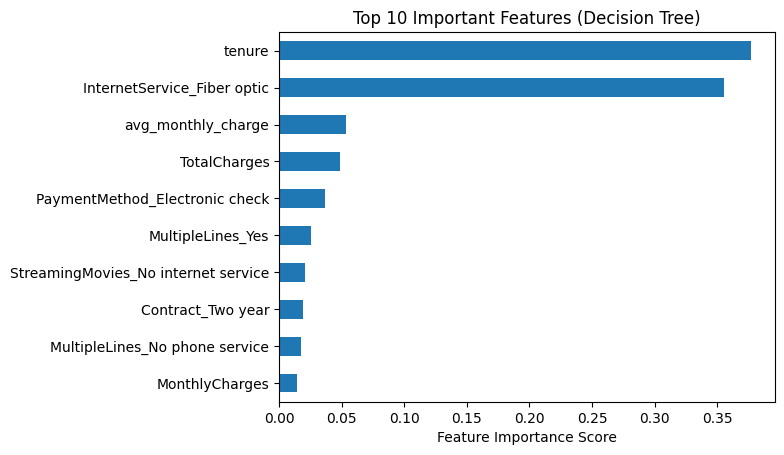

In [22]:

import matplotlib.pyplot as plt

feature_importances = pd.Series(dt.feature_importances_, index=X_train.columns)
top_features = feature_importances.sort_values(ascending=False).head(10)

top_features.plot(kind='barh')
plt.xlabel('Feature Importance Score')
plt.title('Top 10 Important Features (Decision Tree)')
plt.gca().invert_yaxis()
plt.show()


**Observation:**  
The top contributing features identified by the Decision Tree include contract type, tenure, monthly charges, and billing method. This reinforces our earlier EDA observations and confirms that contractual flexibility and billing factors heavily influence customer churn.

### Baseline Model Summary:
- Both Logistic Regression and Decision Tree models confirm that churn prediction is strongly influenced by contract type, tenure, and monthly charges.  
- While baseline models offer a good starting point, more robust ensemble methods (Random Forest, XGBoost) will likely enhance prediction performance and handle feature interactions more effectively.